Name: Xander Sam E. Galapia

Section: CPE22S3

**Instructions:**

Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

\

**Resources:**

Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv

\

**Procedures:**

- 9.1 Introduction to Matplotlib
- 9.2 Plotting with Pandas
- 9.3 Pandas Plotting Subpackage

\
**Data Analysis:**

Provide comments on output from the procedures above.

\

**Supplementary Activity:**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

 - The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

  - The second subplot will be a bar plot showing the net effect this had monthly, using resample().

  - Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

  - Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

\

**Summary/Conclusion:**

Provide a summary of your learnings and the conclusion for this activity.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Read the csv for fb_stock and earthquake
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
eq = pd.read_csv('data/earthquakes-1.csv')



In [ ]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


In [ ]:
eq

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


##1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

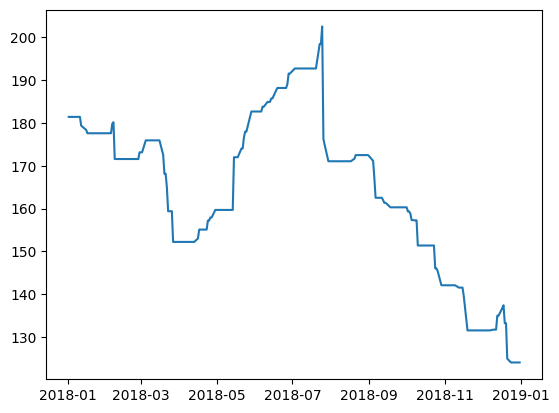

In [ ]:
plt.plot(fb.close.rolling('20D').min()) #Getting it per 20d

##2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

In [ ]:
fb['DifferenceOC'] = fb['open'] - fb['close'] #Subtracting open and close to get the change

fb.DifferenceOC

date
2018-01-02   -3.74
2018-01-03   -2.79
2018-01-04    0.57
2018-01-05   -1.26
2018-01-08   -1.08
              ... 
2018-12-24   -0.96
2018-12-26   -8.18
2018-12-27   -2.08
2018-12-28    2.14
2018-12-31    3.36
Name: DifferenceOC, Length: 251, dtype: float64

<Axes: title={'center': 'Close - Open KDE of Facebook Stock'}, ylabel='Density'>

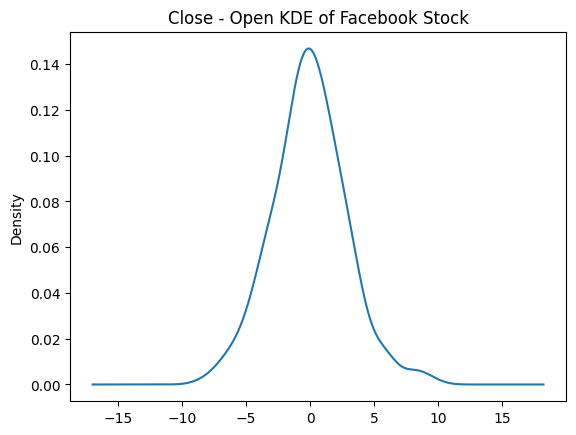

In [ ]:
fb.DifferenceOC.plot(
    kind='kde',
    title = 'Close - Open KDE of Facebook Stock'
)

<Axes: title={'center': 'Close and Open KDE of Facebook Stock'}, ylabel='Density'>

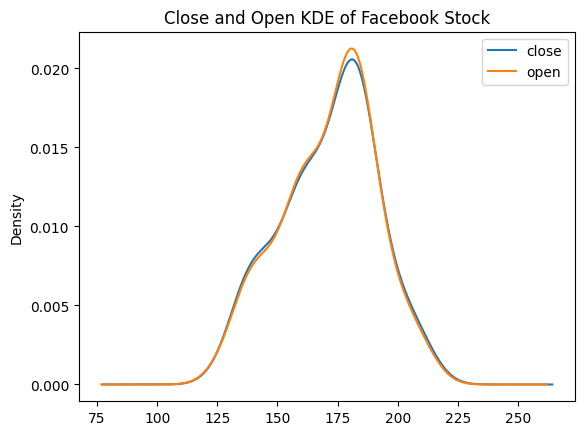

In [ ]:
fb.plot(
    kind='kde',
    y = ['close', 'open'],
    title = 'Close and Open KDE of Facebook Stock'
)

##3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [ ]:
indo = eq.query('parsed_place == "Indonesia"')
indo
#simplfiying the data with only Indonesia in parsed_place

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
180,5.2,mww,1539405255580,"25km E of Bitung, Indonesia",0,Indonesia
421,4.7,mb,1539331098920,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
660,4.4,mb,1539258833830,"51km WSW of Kasiguncu, Indonesia",0,Indonesia
...,...,...,...,...,...,...
9041,4.3,mb,1537296305750,"7km WSW of Karangsubagan, Indonesia",0,Indonesia
9075,4.4,mb,1537288723310,"103km W of Kuripan, Indonesia",0,Indonesia
9108,4.0,mb,1537280181100,"123km NE of Bitung, Indonesia",0,Indonesia
9209,4.7,mb,1537256021950,"18km NE of Reuleuet, Indonesia",0,Indonesia


<Axes: >

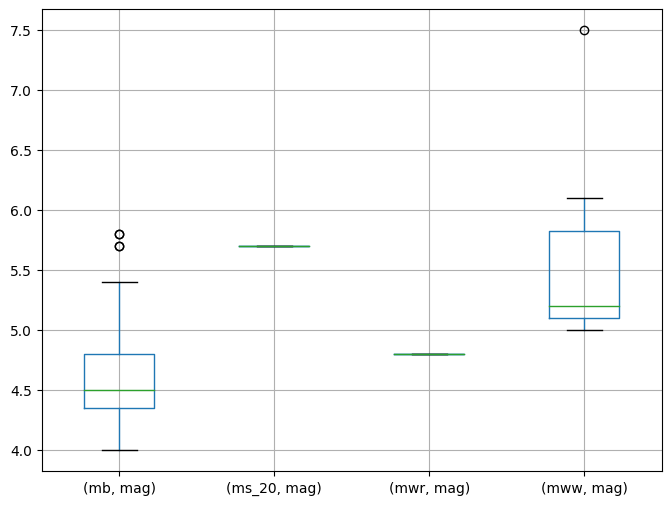

In [ ]:
indo[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(8,6), subplots = False
)

##4.Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

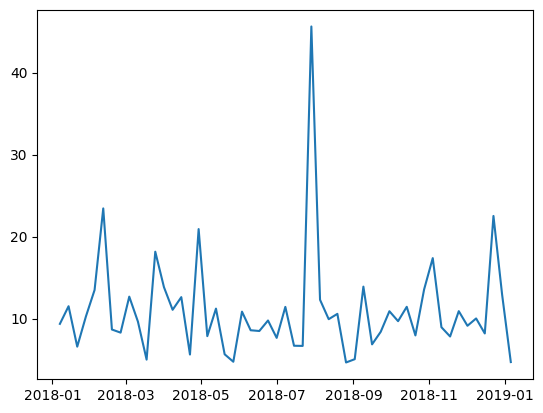

In [ ]:
fbw = fb.resample('W').agg({'high': 'max',
                            'low' : 'min'})
fbw['HL_Diff'] = fbw['high'] - fbw['low']
plt.plot(fbw.HL_Diff)
#Getting the Max/high and Low/Min and get the difference

##5.Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:


 - The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

  - The second subplot will be a bar plot showing the net effect this had monthly, using resample().

  - Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

  - Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

Text(0.5, 1.0, 'Monthly Net Effect')

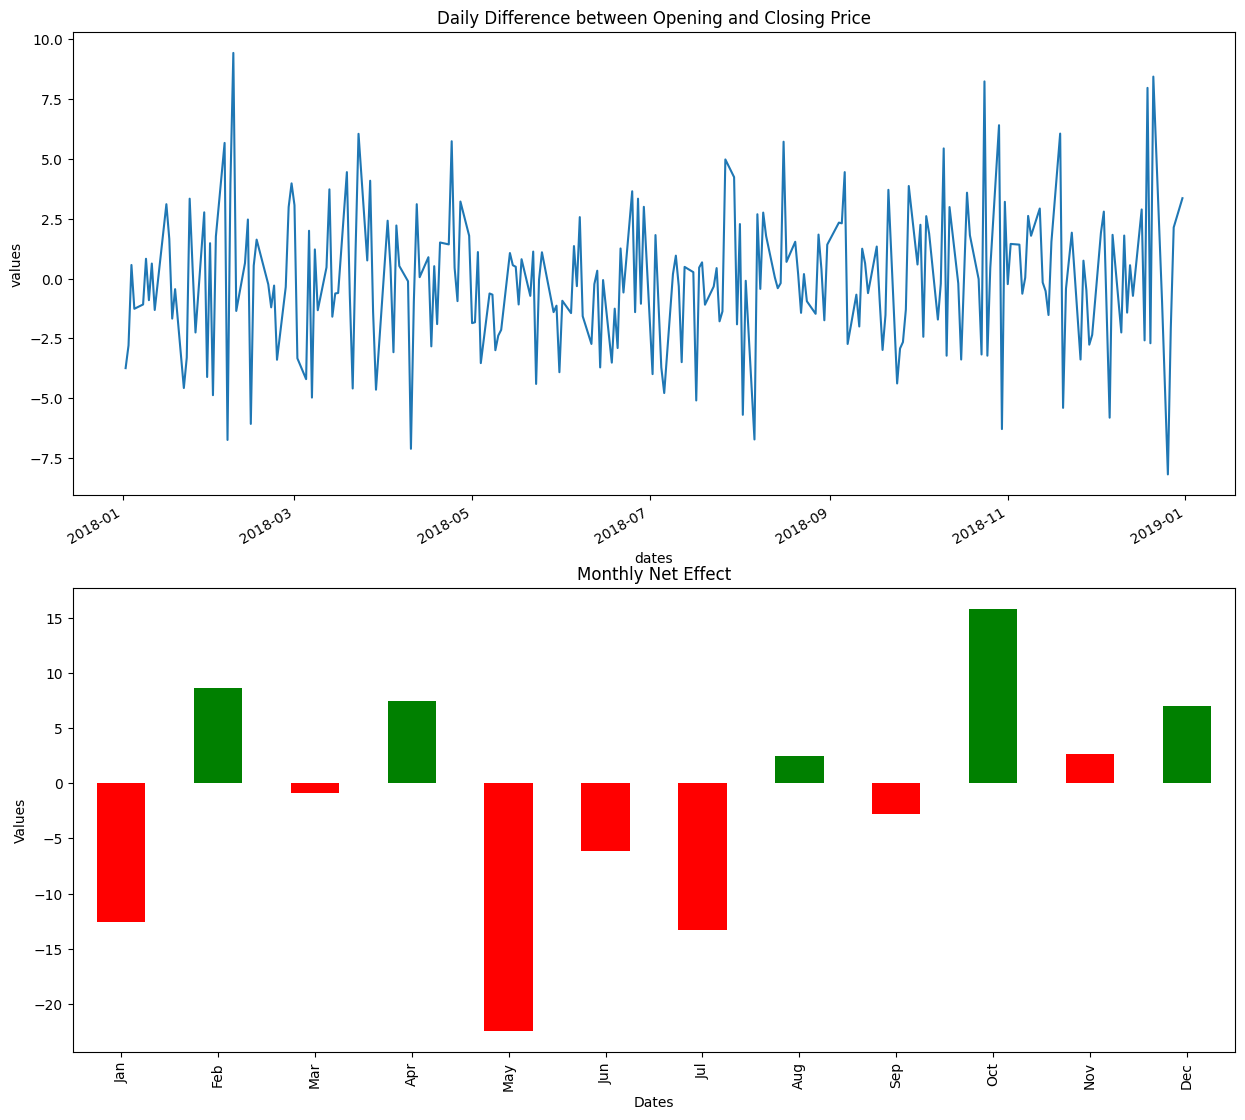

In [ ]:
fig, ax = plt.subplots(2, figsize =[15,15])

diff= fb['open']- fb['close']
neteff = diff.resample('M').sum()

diff.plot(ax = ax[0])

ax[0].set_xlabel('dates')
ax[0].set_ylabel('values')
ax[0].set_title('Daily Difference between Opening and Closing Price')

clr=['red', 'green', 'red', 'green', 'red', 'red', 'red', 'green', 'red', 'green', 'red', 'green']

neteff.plot(kind = 'bar', ax = ax[1], color = clr)

ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Values')
ax[1].set_xticklabels(neteff.index.strftime('%b'))
ax[1].set_title('Monthly Net Effect')

##**Summary/Conclusion**

In this activity we made use of matplotlib. With the use of the plotting library for matplotlib we are able to display the things we want to see like the difference of the open and close not through letters but through visual presentation which is graphs. And that we can modify these graphs according to our preference by coloring or desiding which one is shown.